#### Steps of EDA

* **Problem Statement**

* Univariate Analysis (Num & Cat): For Numerical Vars, we build **Distplot or Histograms** to check the shape of the Data. We can also build Boxplots for Numerical Data to check the presence of Outliers. However, for Categorical Data, We need to build Countplot (Frequency Plot).

* Bivariate Analysis (Predictors vs Target): If my predictor is numerical column and the target is also numerical then we will build the **scatterplot**. However, if the predictor is categorical and the target is numerical, then we can build **Boxplot or Violinplot**. For Predictor and target to be categorical, we can build a cross tabulated data and plot the frequencies.

* Missing Values:

* Outlier Identification & Removal: Any value that is greater than Q3+1.5*IQR is considered to be an outlier on the upper side where as any value which is less than Q1 - 1.5*IQR is an inlier...

* Feature Engineering: Extracting the set of new features from the existing set of features. The purpose of Feature engineering is to ensure that we try to create new features such that the machine is able to learn the pattern efficiently and the model is able to generalise on the basis of new information provided.

* Statistical Analysis - This is where we will do the Hypothesis Testing of the New & Old Variables with the target. If the Statistical Test suggests that the Predictors have a relation with the target, we will include those features into the modelling.

* Categorical Variable Analysis - Here in this step, we convert the categories into dummies. One Hot Encoding, Frequency Encoding, Label Encoding (Ordinal Encoding) & Target Encoding.

* Scaling and transformation: Standard Scaler, Min Max Scaler
Note: When there are outliers in the data use a scaling technique called **ROBUST SCALER**

* Transformation: Log, Power, Reciprocal, Sqrt, Cuberoot, Yeo Johnson, Boxcox

### Sales Prediction for Big Mart Outlets
The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. **The aim is to build a predictive model and predict the sales of each product at a particular outlet.**

Using this model, BigMart will try to understand the properties of products and outlets which play a key role in increasing sales.

Please note that the data may have missing values as some stores might not report all the data due to technical glitches. Hence, it will be required to treat them accordingly. 

In [1]:
# import the libraries

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Import train and test file...

train = pd.read_csv("~/Downloads/Bigmart Train.csv")
test = pd.read_csv("~/Downloads/Bigmart Test.csv")

In [4]:
# Combine the dataset
combined = pd.concat([train, test], ignore_index = True)

In [5]:
combined.tail()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
14199,FDB58,10.5,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,NaN
14200,FDD47,7.6,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,NaN
14201,NCO17,10.0,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1,NaN
14202,FDJ26,15.3,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1,NaN
14203,FDU37,9.5,Regular,0.104720,Canned,79.7960,OUT045,2002,NaN,Tier 2,Supermarket Type1,NaN


In [6]:
train.shape, test.shape, combined.shape

((8523, 12), (5681, 11), (14204, 12))

In [7]:
combined.isnull().sum()[combined.isnull().sum()!=0]

Item_Weight          2439
Outlet_Size          4016
Item_Outlet_Sales    5681
dtype: int64

#### Univariate Analysis

In [8]:
combined.select_dtypes(include = np.number).columns

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')

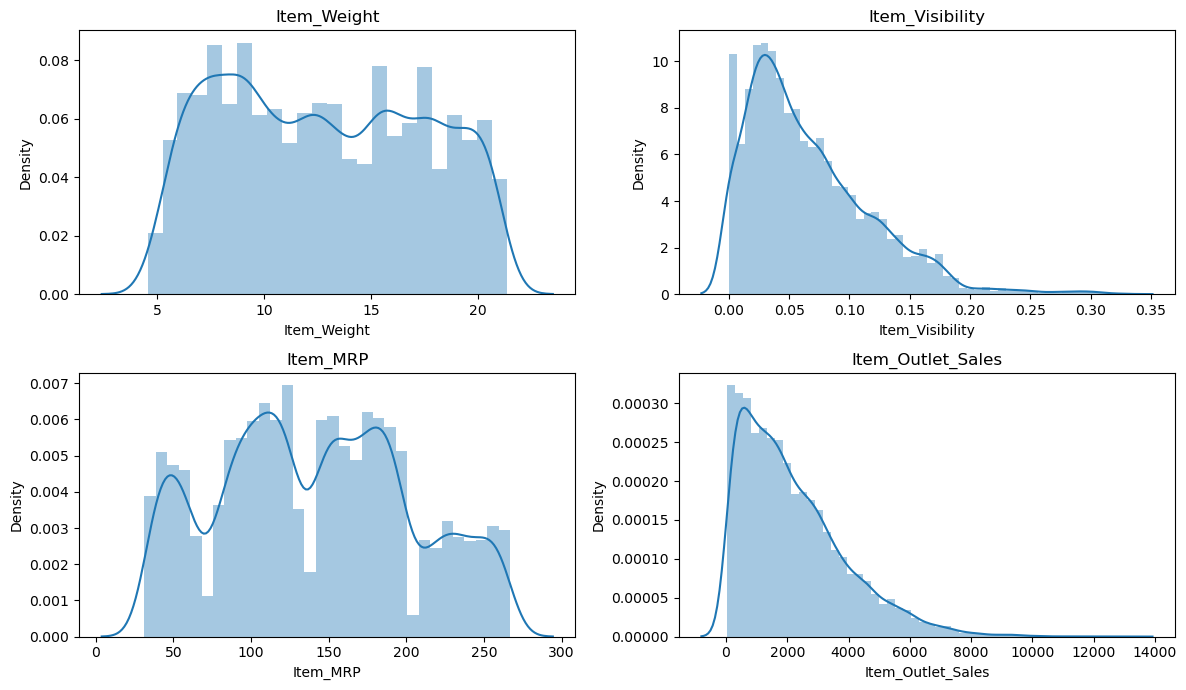

In [11]:
import warnings
warnings.filterwarnings("ignore")
num_vars = ['Item_Weight', 'Item_Visibility', 'Item_MRP',
            'Item_Outlet_Sales']

nrows = 2
ncols = 2
repeater = 1

plt.figure(figsize = (12, 7))
for i in num_vars:
    plt.subplot(nrows, ncols, repeater)
    sns.distplot(combined.loc[:, i])
    plt.title(i)
    repeater+=1
    
plt.tight_layout()
plt.show()

In [12]:
# Categorical Vars....

combined.select_dtypes(include = "object").columns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

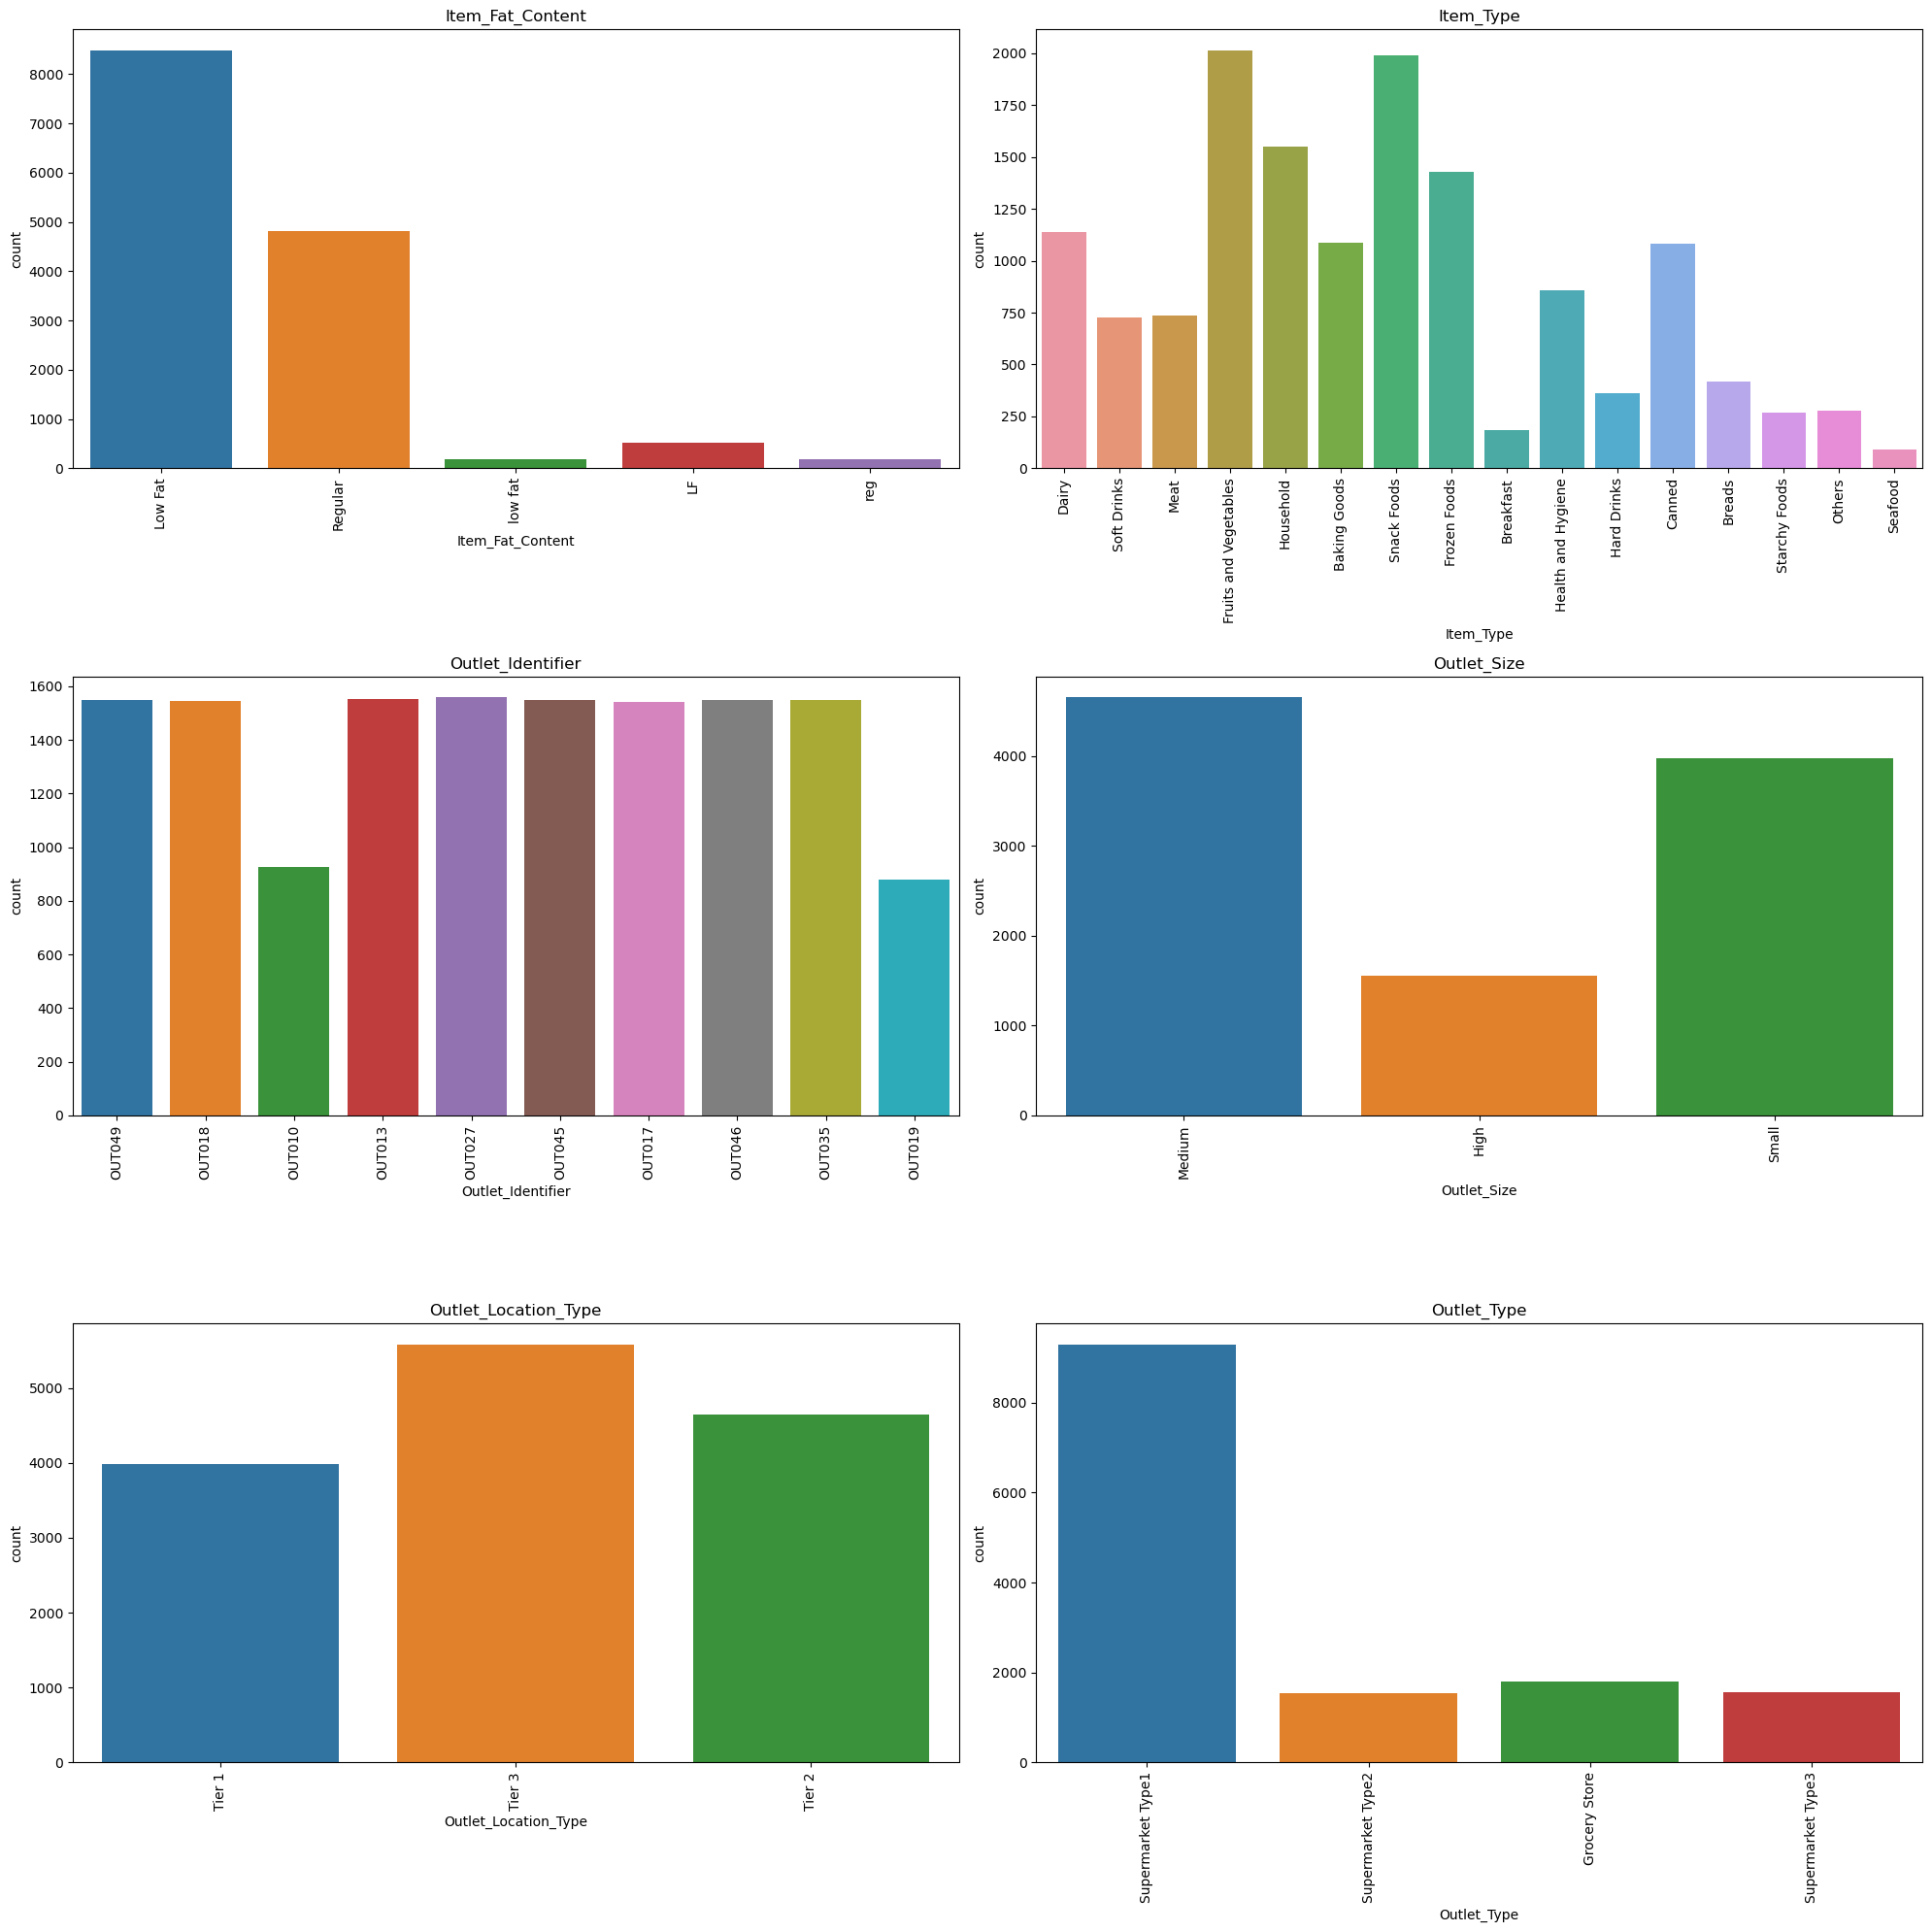

In [20]:
cats = ['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']

nrows = 3
ncols = 2
repeater = 1

plt.figure(figsize = (20,20))
for i in cats:
    plt.subplot(nrows, ncols, repeater)
    sns.countplot(x = i, data  = combined)
    plt.title(i)
    repeater+=1
    plt.xticks(rotation = 90)
    
plt.tight_layout()
plt.show()

<AxesSubplot:>

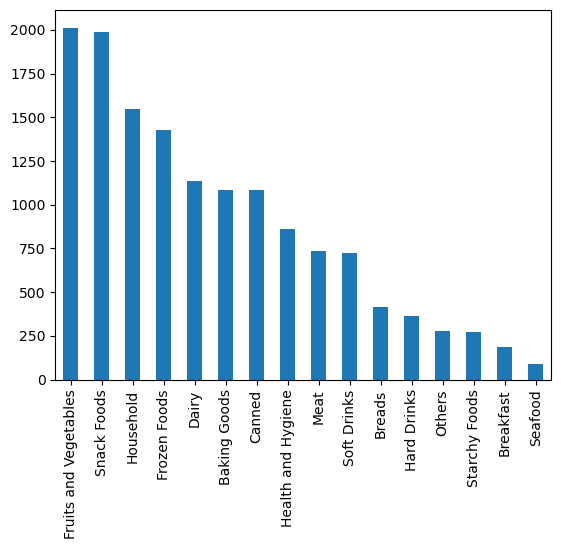

In [22]:
# Item Type
combined.Item_Type.value_counts().plot(kind = "bar")

In [23]:
# Outlet Identifier

combined.Outlet_Identifier.value_counts()[:3]

OUT027    1559
OUT013    1553
OUT049    1550
Name: Outlet_Identifier, dtype: int64

#### Inference:

* Most of the Products are Low Fat Content Products.
* Outlet Size is Medium Size, Type is S1 and they are mostly located in Tier 3 Cities.

* The Top 5 Selling Items are Fruits and Veggies, Dairy, Snacks followed Household & Frozen...

* The Most Popular Outlet is OUT027.

### Num vs Num

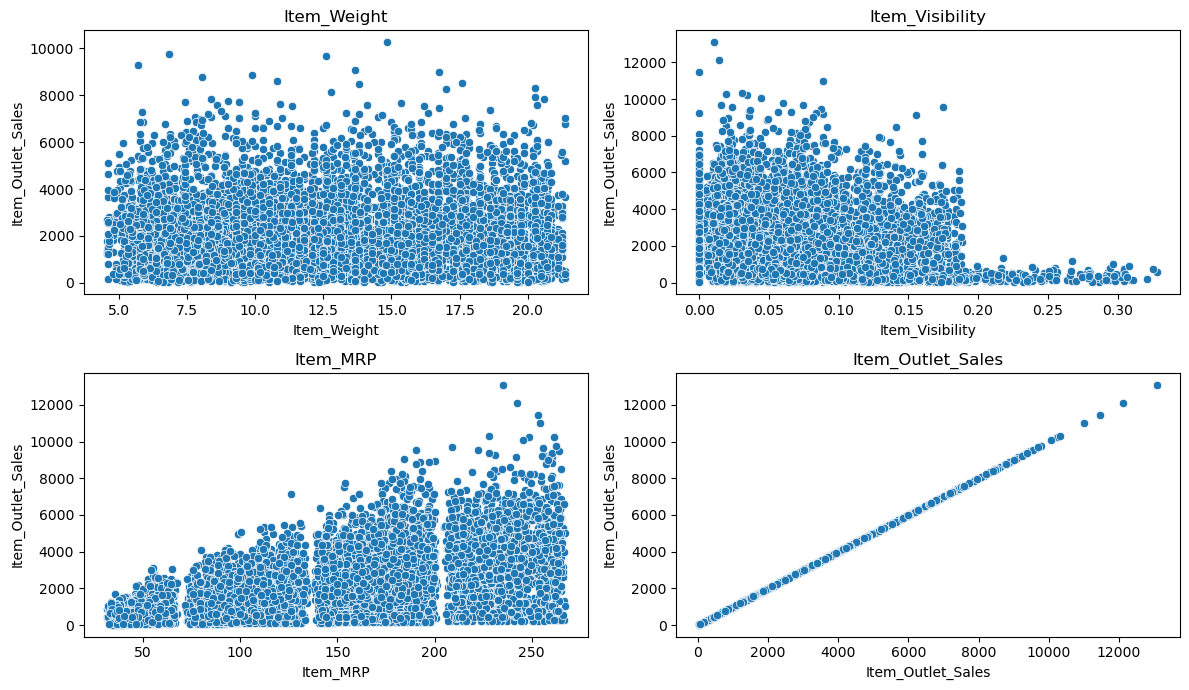

In [25]:
nrows = 2
ncols = 2
repeater = 1

plt.figure(figsize = (12, 7))
for i in num_vars:
    plt.subplot(nrows, ncols, repeater)
    sns.scatterplot(x = i, y = "Item_Outlet_Sales", 
                   data = combined)
    plt.title(i)
    repeater+=1
    
plt.tight_layout()
plt.show()

### Cat vs Num

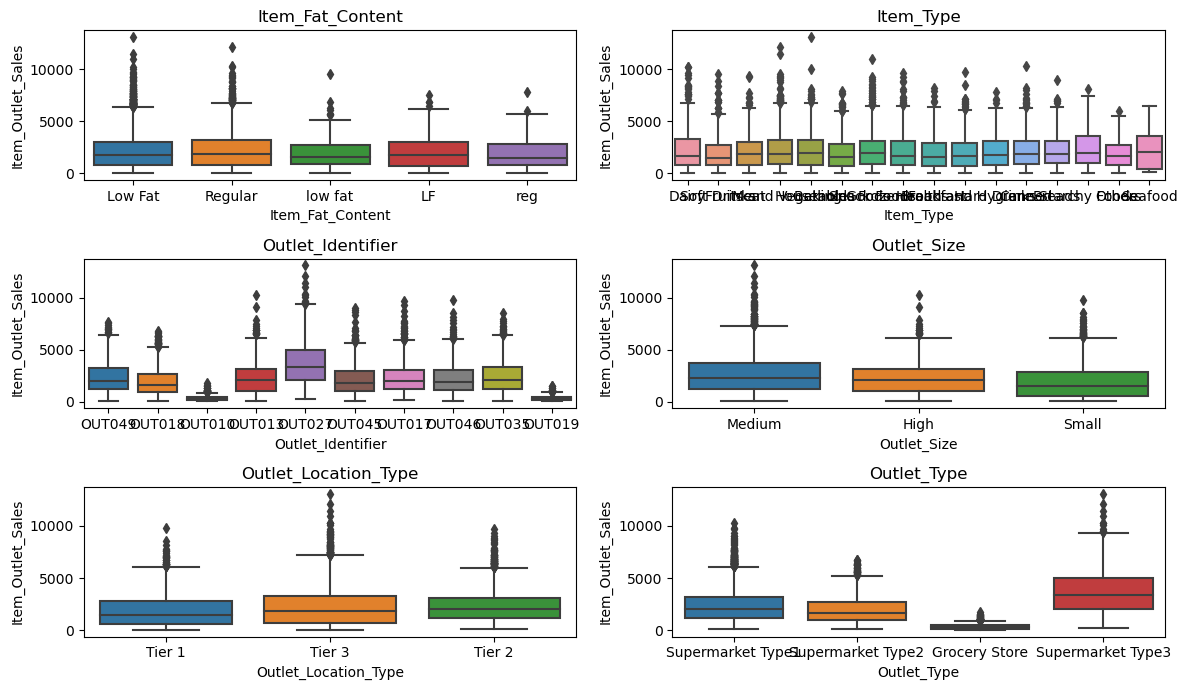

In [29]:
nrows = 3
ncols = 2
repeater = 1

plt.figure(figsize = (12, 7))
for i in cats:
    plt.subplot(nrows, ncols, repeater)
    sns.boxplot(x = i, y = "Item_Outlet_Sales", 
                   data = combined)
    plt.title(i)
    repeater+=1
    
plt.tight_layout()
plt.show()

In [31]:
# lets fix the Item Fat Content
#combined.Item_Fat_Content.unique()
combined.Item_Fat_Content.replace(to_replace =["low fat", "LF",
                                              "reg"],
                                 value = ["Low Fat",
                                         "Low Fat", "Regular"],
                                 inplace = True)



<AxesSubplot:xlabel='Item_Fat_Content', ylabel='Item_Outlet_Sales'>

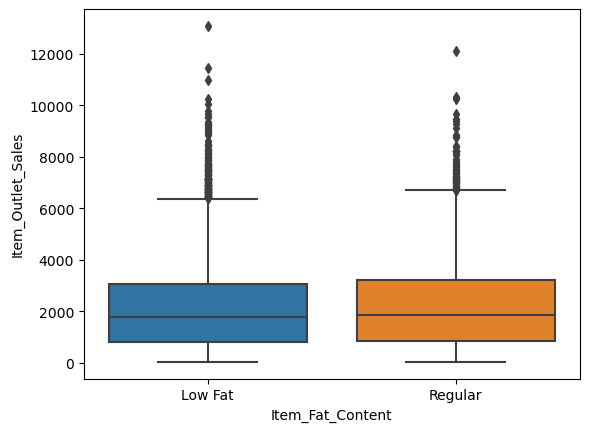

In [32]:
sns.boxplot(x = "Item_Fat_Content", y = "Item_Outlet_Sales",
           data=combined)

### Missing Values

In [34]:
combined.groupby(['Item_Identifier'])\
["Item_Weight"].mean()

Item_Identifier
DRA12    11.600
DRA24    19.350
DRA59     8.270
DRB01     7.390
DRB13     6.115
          ...  
NCZ30     6.590
NCZ41    19.850
NCZ42    10.500
NCZ53     9.600
NCZ54    14.650
Name: Item_Weight, Length: 1559, dtype: float64

In [40]:
#combined.loc[combined.Item_Identifier=="FDA15", "Item_Weight"]

combined["Item_Weight"]=combined.groupby("Item_Identifier")\
["Item_Weight"].apply(lambda x:x.fillna(x.median()))

In [41]:
combined["Item_Visibility"]=combined.groupby("Item_Identifier")\
["Item_Visibility"].apply(lambda x:x.replace(0, x.median()))

In [44]:
# Outlet Size....
# Outlet = id and it could be Type and location...

pd.DataFrame(combined.groupby(["Outlet_Identifier", 
                               "Outlet_Location_Type",
                 "Outlet_Type"])["Outlet_Size"].value_counts())

,,,,Outlet_Size
Outlet_Identifier,Outlet_Location_Type,Outlet_Type,Outlet_Size,
OUT013,Tier 3,Supermarket Type1,High,1553
OUT018,Tier 3,Supermarket Type2,Medium,1546
OUT019,Tier 1,Grocery Store,Small,880
OUT027,Tier 3,Supermarket Type3,Medium,1559
OUT035,Tier 2,Supermarket Type1,Small,1550
OUT046,Tier 1,Supermarket Type1,Small,1550
OUT049,Tier 1,Supermarket Type1,Medium,1550


In [52]:
#combined.loc[combined.Outlet_Size.isnull(), 
       #      ["Outlet_Identifier", "Outlet_Location_Type", 
        #     "Outlet_Type"]].unique()

combined.loc[combined.Outlet_Size.isnull(), 
             "Outlet_Type"].unique()

# Tier 3 has medium and high & Tier 2 Small

array(['Grocery Store', 'Supermarket Type1'], dtype=object)

In [59]:
# S1 and Location Type 

# Check where the OT is S1 and Location is Tier 2...is there a miss

#combined.loc[(combined["Outlet_Location_Type"]=="Tier 2")& 
 #            (combined["Outlet_Type"]=="Supermarket Type1")&
  #          (combined.Outlet_Size).isnull()]

combined.loc[combined.Outlet_Size.isnull(), 
             "Outlet_Size"]="Small"

#### Feature Engineering

In [75]:
combined.head(1)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Cats
0,FDA15,9.3,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.138,FD


In [67]:
itemskilist=[]

for i in combined.Item_Identifier:
    itemskilist.append(i[:2])

In [70]:
combined["Item_Cats"] = pd.Series(itemskilist)

<AxesSubplot:xlabel='Item_Cats', ylabel='Item_Outlet_Sales'>

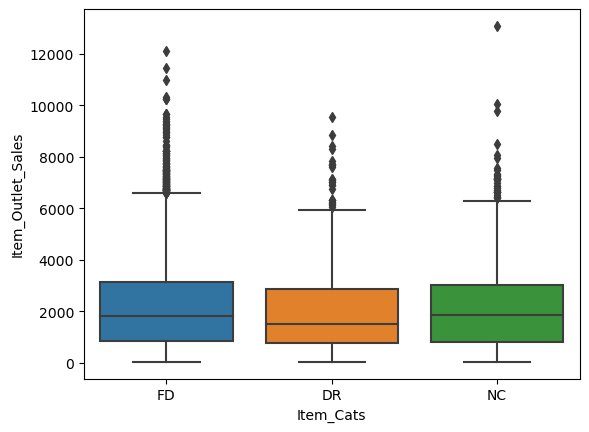

In [71]:
# Visualization...
sns.boxplot(x = "Item_Cats", y  ="Item_Outlet_Sales", 
            data = combined)

In [73]:
# Ho: Item Cat has no relation with the Sales
# Ha: Ho is False

import statsmodels.formula.api as sfa
from statsmodels.stats.anova import anova_lm

model = sfa.ols("Item_Outlet_Sales~Item_Cats", 
                data = combined).fit()

anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
Item_Cats,2.0,3.652405e+07,1.826203e+07,6.278766,0.001884
Residual,8520.0,2.478074e+10,2.908538e+06,NaN,NaN


In [77]:
combined.loc[combined.Item_Cats=="NC", 
             "Item_Fat_Content"]="Non Edible"

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='Item_Outlet_Sales'>

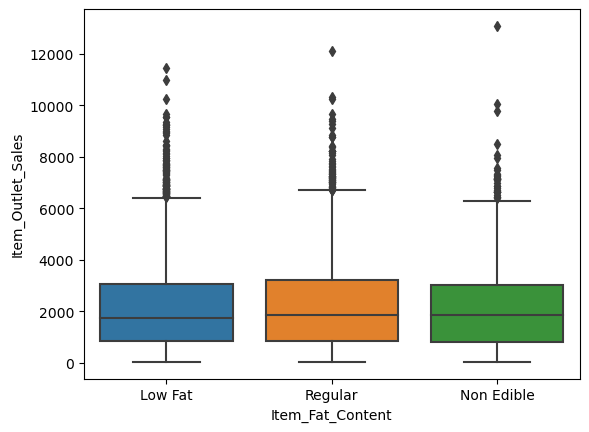

In [78]:
sns.boxplot(x = "Item_Fat_Content", y  ="Item_Outlet_Sales", 
            data = combined)

In [79]:
model = sfa.ols("Item_Outlet_Sales~Item_Fat_Content", 
                data = combined).fit()

anova_lm(model) # Conc: Item Fat Content has no relation with sales

,df,sum_sq,mean_sq,F,PR(>F)
Item_Fat_Content,2.0,9.201502e+06,4.600751e+06,1.580067,0.206022
Residual,8520.0,2.480806e+10,2.911745e+06,NaN,NaN


In [80]:
combined.Item_Type.unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [82]:
perishables = ['Dairy', 'Meat', 'Fruits and Vegetables',
       'Breakfast', 'Breads', 'Starchy Foods', 'Seafood']

In [84]:
def badaldo(x):
    if x in perishables:
        return("Perish")
    else:
        return("Non_Perish")

In [86]:
combined["Item_Converted"] = combined.Item_Type.apply(badaldo)

In [88]:
import scipy.stats as stats

stats.ttest_ind(perish, nonperish)

Ttest_indResult(statistic=nan, pvalue=nan)

In [89]:
combined.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Cats,Item_Converted
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,FD,Perish
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,DR,Non_Perish


In [90]:
# Vintage
combined["Vintage"] = 2013 - combined.Outlet_Establishment_Year

In [91]:
# Drop the Vars

combined.drop(["Item_Identifier", "Item_Fat_Content", 
              "Outlet_Establishment_Year"], axis = 1, 
              inplace = True)

#### Split the Data in Train and Test Again...

In [93]:
newtrain = combined.loc[0:train.shape[0]-1, ]
newtest = combined.loc[train.shape[0]:, ]

In [94]:
newtrain.shape, newtest.shape, train.shape, test.shape

((8523, 12), (5681, 12), (8523, 12), (5681, 11))

In [95]:
newtest.drop("Item_Outlet_Sales", axis = 1, inplace = True)

In [96]:
newtrain.head(2)

,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Cats,Item_Converted,Vintage
0,9.30,0.016047,Dairy,249.8092,OUT049,Medium,Tier 1,Supermarket Type1,3735.1380,FD,Perish,14
1,5.92,0.019278,Soft Drinks,48.2692,OUT018,Medium,Tier 3,Supermarket Type2,443.4228,DR,Non_Perish,4


In [98]:
cols = ['Item_Weight', 'Item_Visibility', 'Item_MRP','Vintage']

for i in cols:
    teststats, pvalue = stats.ttest_ind(newtrain.loc[:, i],
                                       newtrain.Item_Outlet_Sales)
    print("Pvalue for", i, pvalue)

Pvalue for Item_Weight 0.0
Pvalue for Item_Visibility 0.0
Pvalue for Item_MRP 0.0
Pvalue for Vintage 0.0


In [99]:
perish = newtrain.loc[newtrain.Item_Converted=="Perish",
                     "Item_Outlet_Sales"]

nonperish = newtrain.loc[newtrain.Item_Converted=="Non_Perish",
                     "Item_Outlet_Sales"]

teststats, pvalue = stats.ttest_ind(perish, nonperish)
pvalue

0.009371173426112867

In [103]:
model = sfa.ols("Item_Outlet_Sales~Outlet_Type", 
                data = combined).fit()

anova_lm(model) # Conc: Item Fat Content has no relation with sales

,df,sum_sq,mean_sq,F,PR(>F)
Outlet_Type,3.0,5.945604e+09,1.981868e+09,894.650012,0.0
Residual,8519.0,1.887166e+10,2.215244e+06,NaN,NaN


In [104]:
newtrain.head(2)

,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Cats,Item_Converted,Vintage
0,9.30,0.016047,Dairy,249.8092,OUT049,Medium,Tier 1,Supermarket Type1,3735.1380,FD,Perish,14
1,5.92,0.019278,Soft Drinks,48.2692,OUT018,Medium,Tier 3,Supermarket Type2,443.4228,DR,Non_Perish,4


In [112]:
mapped = newtrain.groupby("Item_Type")\
["Item_Outlet_Sales"].mean().to_dict()

In [115]:
newtrain["Item_Type"] = newtrain.Item_Type.map(mapped)

In [116]:
newtest["Item_Type"] = newtest.Item_Type.map(mapped)

In [117]:
newtrain.head()

,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Cats,Item_Converted,Vintage
0,9.30,0.016047,2232.542597,249.8092,OUT049,Medium,Tier 1,Supermarket Type1,3735.1380,FD,Perish,14
1,5.92,0.019278,2006.511735,48.2692,OUT018,Medium,Tier 3,Supermarket Type2,443.4228,DR,Non_Perish,4
2,17.50,0.016760,2158.977911,141.6180,OUT049,Medium,Tier 1,Supermarket Type1,2097.2700,FD,Perish,14
3,19.20,0.022914,2289.009592,182.0950,OUT010,Small,Tier 3,Grocery Store,732.3800,FD,Perish,15
4,8.93,0.013177,2258.784300,53.8614,OUT013,High,Tier 3,Supermarket Type1,994.7052,NC,Non_Perish,26


<AxesSubplot:>

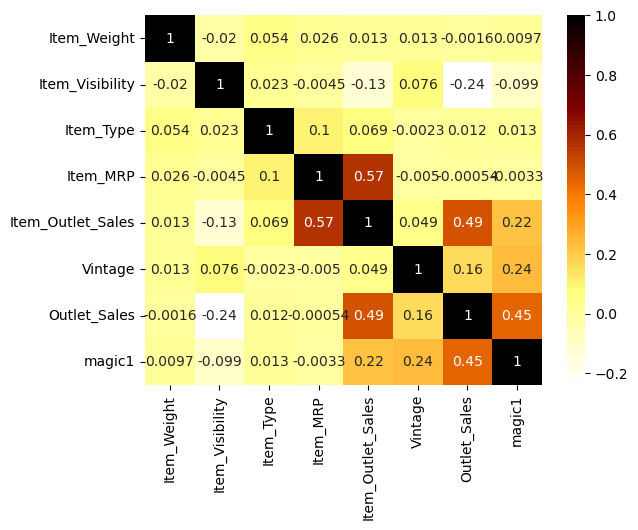

In [124]:
sns.heatmap(newtrain.corr(), annot=True, cmap = "afmhot_r")

In [121]:
newtrain["Outlet_Sales"]= newtrain.groupby("Outlet_Identifier")\
["Item_Outlet_Sales"].transform("median")

In [123]:
newtrain["magic1"]= newtrain.groupby("Outlet_Size")\
["Item_Outlet_Sales"].transform("median")

In [125]:
newtrain.head()

,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Cats,Item_Converted,Vintage,Outlet_Sales,magic1
0,9.30,0.016047,2232.542597,249.8092,OUT049,Medium,Tier 1,Supermarket Type1,3735.1380,FD,Perish,14,1966.1074,2251.0698
1,5.92,0.019278,2006.511735,48.2692,OUT018,Medium,Tier 3,Supermarket Type2,443.4228,DR,Non_Perish,4,1655.1788,2251.0698
2,17.50,0.016760,2158.977911,141.6180,OUT049,Medium,Tier 1,Supermarket Type1,2097.2700,FD,Perish,14,1966.1074,2251.0698
3,19.20,0.022914,2289.009592,182.0950,OUT010,Small,Tier 3,Grocery Store,732.3800,FD,Perish,15,250.3408,1484.0682
4,8.93,0.013177,2258.784300,53.8614,OUT013,High,Tier 3,Supermarket Type1,994.7052,NC,Non_Perish,26,2050.6640,2050.6640


In [126]:
pd.get_dummies(newtrain, drop_first = True)

,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Item_Outlet_Sales,Vintage,Outlet_Sales,magic1,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,...,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Cats_FD,Item_Cats_NC,Item_Converted_Perish
0,9.300,0.016047,2232.542597,249.8092,3735.1380,14,1966.1074,2251.0698,0,0,...,1,0,0,0,1,0,0,1,0,1
1,5.920,0.019278,2006.511735,48.2692,443.4228,4,1655.1788,2251.0698,0,0,...,1,0,0,1,0,1,0,0,0,0
2,17.500,0.016760,2158.977911,141.6180,2097.2700,14,1966.1074,2251.0698,0,0,...,1,0,0,0,1,0,0,1,0,1
3,19.200,0.022914,2289.009592,182.0950,732.3800,15,250.3408,1484.0682,0,0,...,0,1,0,1,0,0,0,1,0,1
4,8.930,0.013177,2258.784300,53.8614,994.7052,26,2050.6640,2050.6640,1,0,...,0,0,0,1,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0.056783,2277.321739,214.5218,2778.3834,26,2050.6640,2050.6640,1,0,...,0,0,0,1,1,0,0,1,0,0
8519,8.380,0.046982,1952.971207,108.1570,549.2850,11,1834.9448,1484.0682,0,0,...,0,1,1,0,1,0,0,1,0,0
8520,10.600,0.035186,2010.000265,85.1224,1193.1136,9,2109.2544,1484.0682,0,0,...,0,1,1,0,1,0,0,0,1,0
8521,7.210,0.145221,2277.321739,103.1332,1845.5976,4,1655.1788,2251.0698,0,0,...,1,0,0,1,0,1,0,1,0,0
